In [1]:
from __future__ import print_function

import logging
import os.path
import sys

In [2]:
import re
import pandas as pd
import numpy as np
import spacy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from collections import defaultdict
from gensim.corpora import WikiCorpus
from time import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [6]:
program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)
 
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))
 
namaFileInput = "../data/idwiki-latest-pages-articles.xml.bz2"
namaFileOutput = "../data/wiki.id.case.text"
 
space = " "
i = 0
 
output = open(namaFileOutput, 'w')

wiki = WikiCorpus(namaFileInput, lemmatize=False, dictionary={}, lower=False)
for text in wiki.get_texts():
    output.write(' '.join(text) + '\n')
    i = i + 1
    if i % 10000 == 0:
        logger.info("Saved " + str(i) + " articles")

output.close()
logger.info("Finished Saved " + str(i) + " articles")

2020-08-31 01:17:13,694: INFO: running /Users/sahrul/miniconda3/envs/ner/lib/python3.7/site-packages/ipykernel_launcher.py -f /Users/sahrul/Library/Jupyter/runtime/kernel-9643fcff-396f-4bed-93bc-3b2b19f16579.json
2020-08-31 01:17:35,825: INFO: Saved 10000 articles
2020-08-31 01:17:51,135: INFO: Saved 20000 articles
2020-08-31 01:18:04,254: INFO: Saved 30000 articles
2020-08-31 01:18:15,984: INFO: Saved 40000 articles
2020-08-31 01:18:28,514: INFO: Saved 50000 articles
2020-08-31 01:18:39,548: INFO: Saved 60000 articles
2020-08-31 01:18:51,631: INFO: Saved 70000 articles
2020-08-31 01:19:06,092: INFO: Saved 80000 articles
2020-08-31 01:19:19,260: INFO: Saved 90000 articles
2020-08-31 01:19:32,647: INFO: Saved 100000 articles
2020-08-31 01:19:45,248: INFO: Saved 110000 articles
2020-08-31 01:19:55,880: INFO: Saved 120000 articles
2020-08-31 01:20:11,866: INFO: Saved 130000 articles
2020-08-31 01:20:25,183: INFO: Saved 140000 articles
2020-08-31 01:20:31,575: INFO: Saved 150000 articles
2

In [7]:
import multiprocessing
import logging
import os.path
import sys
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
 
program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)
 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))
 
namaFileInput = "../data/wiki.id.case.text"
namaFileOutput = "../checkpoint/w2vec_wiki_id_case"
 
model = Word2Vec(
    LineSentence(namaFileInput), 
    size=400, window=5, min_count=5, 
    workers=multiprocessing.cpu_count()
)

model.init_sims(replace=True)
model.save(namaFileOutput)

2020-08-31 01:25:58,467: INFO: running /Users/sahrul/miniconda3/envs/ner/lib/python3.7/site-packages/ipykernel_launcher.py -f /Users/sahrul/Library/Jupyter/runtime/kernel-9643fcff-396f-4bed-93bc-3b2b19f16579.json
2020-08-31 01:25:58,473: INFO: collecting all words and their counts
2020-08-31 01:25:58,476: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-31 01:26:01,090: INFO: PROGRESS: at sentence #10000, processed 8995721 words, keeping 324744 word types
2020-08-31 01:26:02,675: INFO: PROGRESS: at sentence #20000, processed 14468659 words, keeping 451767 word types
2020-08-31 01:26:03,943: INFO: PROGRESS: at sentence #30000, processed 18870261 words, keeping 551243 word types
2020-08-31 01:26:05,134: INFO: PROGRESS: at sentence #40000, processed 22917196 words, keeping 633764 word types
2020-08-31 01:26:06,428: INFO: PROGRESS: at sentence #50000, processed 26968760 words, keeping 730664 word types
2020-08-31 01:26:07,618: INFO: PROGRESS: at sentence #600

2020-08-31 01:28:14,247: INFO: EPOCH 1 - PROGRESS: at 9.46% examples, 893615 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:28:15,249: INFO: EPOCH 1 - PROGRESS: at 9.97% examples, 890027 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:28:16,249: INFO: EPOCH 1 - PROGRESS: at 10.55% examples, 889926 words/s, in_qsize 1, out_qsize 0
2020-08-31 01:28:17,253: INFO: EPOCH 1 - PROGRESS: at 11.10% examples, 889726 words/s, in_qsize 14, out_qsize 0
2020-08-31 01:28:18,270: INFO: EPOCH 1 - PROGRESS: at 11.73% examples, 890621 words/s, in_qsize 10, out_qsize 1
2020-08-31 01:28:19,284: INFO: EPOCH 1 - PROGRESS: at 12.47% examples, 892507 words/s, in_qsize 11, out_qsize 0
2020-08-31 01:28:20,295: INFO: EPOCH 1 - PROGRESS: at 13.13% examples, 892354 words/s, in_qsize 13, out_qsize 2
2020-08-31 01:28:21,298: INFO: EPOCH 1 - PROGRESS: at 13.89% examples, 893779 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:28:22,298: INFO: EPOCH 1 - PROGRESS: at 14.63% examples, 893648 words/s, in_qsize 10, out_qsi

2020-08-31 01:29:29,069: INFO: EPOCH 1 - PROGRESS: at 76.40% examples, 774792 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:29:30,072: INFO: EPOCH 1 - PROGRESS: at 76.95% examples, 773944 words/s, in_qsize 13, out_qsize 1
2020-08-31 01:29:31,092: INFO: EPOCH 1 - PROGRESS: at 77.42% examples, 771632 words/s, in_qsize 12, out_qsize 4
2020-08-31 01:29:32,095: INFO: EPOCH 1 - PROGRESS: at 77.96% examples, 770878 words/s, in_qsize 9, out_qsize 1
2020-08-31 01:29:33,100: INFO: EPOCH 1 - PROGRESS: at 78.49% examples, 769095 words/s, in_qsize 14, out_qsize 0
2020-08-31 01:29:34,113: INFO: EPOCH 1 - PROGRESS: at 79.07% examples, 767596 words/s, in_qsize 15, out_qsize 1
2020-08-31 01:29:35,121: INFO: EPOCH 1 - PROGRESS: at 79.67% examples, 767035 words/s, in_qsize 13, out_qsize 1
2020-08-31 01:29:36,141: INFO: EPOCH 1 - PROGRESS: at 80.24% examples, 766396 words/s, in_qsize 10, out_qsize 1
2020-08-31 01:29:37,157: INFO: EPOCH 1 - PROGRESS: at 80.71% examples, 765309 words/s, in_qsize 11, out_q

2020-08-31 01:30:36,810: INFO: EPOCH 2 - PROGRESS: at 12.63% examples, 755763 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:30:37,815: INFO: EPOCH 2 - PROGRESS: at 13.18% examples, 755697 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:30:38,820: INFO: EPOCH 2 - PROGRESS: at 13.83% examples, 756637 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:30:39,841: INFO: EPOCH 2 - PROGRESS: at 14.49% examples, 757331 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:30:40,862: INFO: EPOCH 2 - PROGRESS: at 15.05% examples, 758008 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:30:41,869: INFO: EPOCH 2 - PROGRESS: at 15.69% examples, 758410 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:30:42,899: INFO: EPOCH 2 - PROGRESS: at 16.38% examples, 758837 words/s, in_qsize 15, out_qsize 1
2020-08-31 01:30:43,901: INFO: EPOCH 2 - PROGRESS: at 16.99% examples, 759548 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:30:44,901: INFO: EPOCH 2 - PROGRESS: at 17.53% examples, 758604 words/s, in_qsize 14, out_

2020-08-31 01:31:51,907: INFO: EPOCH 2 - PROGRESS: at 80.98% examples, 751946 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:31:52,934: INFO: EPOCH 2 - PROGRESS: at 81.72% examples, 751730 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:31:53,982: INFO: EPOCH 2 - PROGRESS: at 82.37% examples, 750032 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:31:54,993: INFO: EPOCH 2 - PROGRESS: at 83.14% examples, 749142 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:31:55,995: INFO: EPOCH 2 - PROGRESS: at 83.92% examples, 748933 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:31:57,017: INFO: EPOCH 2 - PROGRESS: at 84.66% examples, 748879 words/s, in_qsize 14, out_qsize 2
2020-08-31 01:31:58,024: INFO: EPOCH 2 - PROGRESS: at 85.52% examples, 749285 words/s, in_qsize 13, out_qsize 0
2020-08-31 01:31:59,036: INFO: EPOCH 2 - PROGRESS: at 86.32% examples, 749269 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:32:00,041: INFO: EPOCH 2 - PROGRESS: at 86.89% examples, 748968 words/s, in_qsize 14, out_

2020-08-31 01:32:59,711: INFO: EPOCH 3 - PROGRESS: at 18.66% examples, 756891 words/s, in_qsize 12, out_qsize 1
2020-08-31 01:33:00,768: INFO: EPOCH 3 - PROGRESS: at 19.20% examples, 754304 words/s, in_qsize 12, out_qsize 3
2020-08-31 01:33:01,775: INFO: EPOCH 3 - PROGRESS: at 19.82% examples, 753230 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:33:02,789: INFO: EPOCH 3 - PROGRESS: at 20.26% examples, 751935 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:33:03,790: INFO: EPOCH 3 - PROGRESS: at 20.94% examples, 750781 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:33:04,791: INFO: EPOCH 3 - PROGRESS: at 21.56% examples, 748343 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:33:05,793: INFO: EPOCH 3 - PROGRESS: at 22.28% examples, 747356 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:33:06,795: INFO: EPOCH 3 - PROGRESS: at 22.88% examples, 745132 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:33:07,808: INFO: EPOCH 3 - PROGRESS: at 23.49% examples, 743778 words/s, in_qsize 14, out_

2020-08-31 01:34:14,641: INFO: EPOCH 3 - PROGRESS: at 83.47% examples, 708043 words/s, in_qsize 14, out_qsize 2
2020-08-31 01:34:15,686: INFO: EPOCH 3 - PROGRESS: at 84.03% examples, 706093 words/s, in_qsize 13, out_qsize 1
2020-08-31 01:34:16,707: INFO: EPOCH 3 - PROGRESS: at 84.30% examples, 702506 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:34:17,723: INFO: EPOCH 3 - PROGRESS: at 84.90% examples, 700899 words/s, in_qsize 13, out_qsize 2
2020-08-31 01:34:18,735: INFO: EPOCH 3 - PROGRESS: at 85.56% examples, 700529 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:34:19,763: INFO: EPOCH 3 - PROGRESS: at 86.14% examples, 699073 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:34:20,764: INFO: EPOCH 3 - PROGRESS: at 86.57% examples, 697278 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:34:21,768: INFO: EPOCH 3 - PROGRESS: at 87.07% examples, 696782 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:34:22,770: INFO: EPOCH 3 - PROGRESS: at 87.80% examples, 696709 words/s, in_qsize 15, out_

2020-08-31 01:35:22,452: INFO: EPOCH 4 - PROGRESS: at 16.44% examples, 687719 words/s, in_qsize 13, out_qsize 2
2020-08-31 01:35:23,459: INFO: EPOCH 4 - PROGRESS: at 16.96% examples, 686683 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:35:24,462: INFO: EPOCH 4 - PROGRESS: at 17.46% examples, 686081 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:35:25,485: INFO: EPOCH 4 - PROGRESS: at 17.99% examples, 685291 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:35:26,500: INFO: EPOCH 4 - PROGRESS: at 18.46% examples, 684509 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:35:27,512: INFO: EPOCH 4 - PROGRESS: at 18.97% examples, 683571 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:35:28,535: INFO: EPOCH 4 - PROGRESS: at 19.45% examples, 682396 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:35:29,549: INFO: EPOCH 4 - PROGRESS: at 20.05% examples, 683504 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:35:30,575: INFO: EPOCH 4 - PROGRESS: at 20.60% examples, 683571 words/s, in_qsize 16, out_

2020-08-31 01:36:37,409: INFO: EPOCH 4 - PROGRESS: at 81.38% examples, 691197 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:36:38,422: INFO: EPOCH 4 - PROGRESS: at 82.06% examples, 690836 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:36:39,471: INFO: EPOCH 4 - PROGRESS: at 82.87% examples, 690397 words/s, in_qsize 13, out_qsize 2
2020-08-31 01:36:40,478: INFO: EPOCH 4 - PROGRESS: at 83.61% examples, 690603 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:36:41,482: INFO: EPOCH 4 - PROGRESS: at 84.27% examples, 690076 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:36:42,509: INFO: EPOCH 4 - PROGRESS: at 84.99% examples, 689597 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:36:43,528: INFO: EPOCH 4 - PROGRESS: at 85.65% examples, 689212 words/s, in_qsize 14, out_qsize 0
2020-08-31 01:36:44,532: INFO: EPOCH 4 - PROGRESS: at 86.27% examples, 688543 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:36:45,535: INFO: EPOCH 4 - PROGRESS: at 86.82% examples, 688375 words/s, in_qsize 15, out_

2020-08-31 01:37:44,573: INFO: EPOCH 5 - PROGRESS: at 13.65% examples, 668309 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:37:45,584: INFO: EPOCH 5 - PROGRESS: at 14.24% examples, 669209 words/s, in_qsize 15, out_qsize 1
2020-08-31 01:37:46,592: INFO: EPOCH 5 - PROGRESS: at 14.77% examples, 669794 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:37:47,598: INFO: EPOCH 5 - PROGRESS: at 15.21% examples, 668011 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:37:48,609: INFO: EPOCH 5 - PROGRESS: at 15.75% examples, 668127 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:37:49,616: INFO: EPOCH 5 - PROGRESS: at 16.37% examples, 668739 words/s, in_qsize 14, out_qsize 1
2020-08-31 01:37:50,627: INFO: EPOCH 5 - PROGRESS: at 16.91% examples, 668812 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:37:51,642: INFO: EPOCH 5 - PROGRESS: at 17.40% examples, 668761 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:37:52,652: INFO: EPOCH 5 - PROGRESS: at 17.91% examples, 668035 words/s, in_qsize 12, out_

2020-08-31 01:38:59,702: INFO: EPOCH 5 - PROGRESS: at 77.03% examples, 667595 words/s, in_qsize 11, out_qsize 3
2020-08-31 01:39:00,702: INFO: EPOCH 5 - PROGRESS: at 77.54% examples, 667028 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:39:01,737: INFO: EPOCH 5 - PROGRESS: at 78.04% examples, 666703 words/s, in_qsize 13, out_qsize 3
2020-08-31 01:39:02,755: INFO: EPOCH 5 - PROGRESS: at 78.70% examples, 666997 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:39:03,775: INFO: EPOCH 5 - PROGRESS: at 79.35% examples, 667252 words/s, in_qsize 16, out_qsize 0
2020-08-31 01:39:04,787: INFO: EPOCH 5 - PROGRESS: at 79.80% examples, 666599 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:39:05,795: INFO: EPOCH 5 - PROGRESS: at 80.31% examples, 666188 words/s, in_qsize 15, out_qsize 0
2020-08-31 01:39:06,814: INFO: EPOCH 5 - PROGRESS: at 80.77% examples, 665983 words/s, in_qsize 14, out_qsize 0
2020-08-31 01:39:07,815: INFO: EPOCH 5 - PROGRESS: at 81.28% examples, 665876 words/s, in_qsize 12, out_

In [2]:
import gensim

namaFileModel = "../checkpoint/w2vec_wiki_id_case"
model = gensim.models.Word2Vec.load(namaFileModel)

hasil = model.most_similar("Jakarta")

print("Jakarta:{}".format(hasil))

/Users/sahrul/miniconda3/envs/ner/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


Jakarta:[('Surabaya', 0.6057917475700378), ('Warteg', 0.5702860951423645), ('Bandung', 0.5562906265258789), ('Ciputat', 0.5411451458930969), ('Bekasi', 0.5294037461280823), ('Djakarta', 0.528831422328949), ('Yogyakarta', 0.5229000449180603), ('Kemayoran', 0.5182145237922668), ('jakarta', 0.5134392976760864), ('Denpasar', 0.5102496147155762)]


In [31]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 400), dtype='f')
    word_labels = [word]
    color_list  = ['red']
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    close_words = model.wv.most_similar([word])
    
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

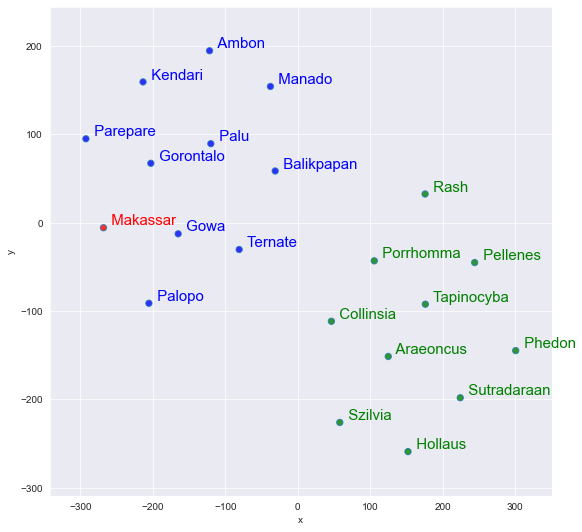

In [33]:
tsnescatterplot(model, 'Makassar', [i[0] for i in model.wv.most_similar(negative=["Makassar"])])